In [2]:
import os
os.chdir("C:/vcu extra/assignment/Python")

In [3]:
!pip install pandas

In [4]:
!pip install numpy

In [5]:
!pip install matplotlib

In [6]:
!pip install statsmodels

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as stests

In [8]:
df=pd.read_csv("C:\\vcu extra\\assignment\\data\\NSSO68.csv",encoding="Latin-1", low_memory=False)

In [9]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [10]:
state_data=df[df['state_1']=="MH"]

In [29]:
state_data.to_csv("../Filtered_state_data.csv", index=False) 

In [12]:
print("Dataset Information:\n")
print("Column Names:")
print(state_data.columns.tolist())
print("\nFirst 5 rows:")
print(state_data.head())
print("\nDimensions(rows,columns):")
print(state_data.shape)
print("\nTotal Missing Values:")
print(state_data.isna().sum().sum())

Dataset Information:

Column Names:
['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number', 'Sample', 'Sector', 'state', 'State_Region', 'District', 'Stratum_Number', 'Sub_Stratum', 'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region', 'Hamlet_Group_Sub_Block', 't', 'X_Stage_Stratum', 'HHS_No', 'Level', 'Filler', 'hhdsz', 'NIC_2008', 'NCO_2004', 'HH_type', 'Religion', 'Social_Group', 'Whether_owns_any_land', 'Type_of_land_owned', 'Land_Owned', 'Land_Leased_in', 'Otherwise_possessed', 'Land_Leased_out', 'Land_Total_possessed', 'During_July_June_Cultivated', 'During_July_June_Irrigated', 'NSS', 'NSC', 'MLT', 'land_tt', 'Cooking_code', 'Lighting_code', 'Dwelling_unit_code', 'Regular_salary_earner', 'Perform_Ceremony', 'Meals_seved_to_non_hhld_members', 'Possess_ration_card', 'Type_of_ration_card', 'MPCE_URP', 'MPCE_MRP', 'Person_Srl_No', 'Relation', 'Sex', 'Age', 'Marital_Status', 'Education', 'Days_Stayed_away', 'No_of_Meals_per_day', 'Meals_School', 'Meals_Empl

In [13]:
state_data.isnull().sum().sort_values(ascending=False)

soyabean_q         8043
soyabean_v         8043
Meals_School       7953
Meals_Employer     7899
Land_Leased_out    7880
                   ... 
palak_q               0
carrot_q              0
radish_q              0
brinjal_q             0
fv_tot                0
Length: 384, dtype: int64

In [14]:
state_subset = state_data[[
    'state_1', 
    'District', 
    'Region', 
    'Sector', 
    'State_Region', 
    'Meals_At_Home', 
    'ricetotal_v', 
    'wheattotal_v', 
    'Milktotal_v', 
    'pulsestot_v', 
    'nonvegtotal_v', 
    'fruitstt_v', 
    'No_of_Meals_per_day'
]]

In [15]:
print("Missing Values Before Imputation:\n")
print(state_subset.isna().sum())

Missing Values Before Imputation:

state_1                  0
District                 0
Region                   0
Sector                   0
State_Region             0
Meals_At_Home          184
ricetotal_v              0
wheattotal_v             0
Milktotal_v              0
pulsestot_v              0
nonvegtotal_v            0
fruitstt_v               0
No_of_Meals_per_day      0
dtype: int64


In [16]:
state_cleaned=state_subset.fillna(state_subset.mean(numeric_only=True))
print("\n missing values after imputation:\n")
print(state_cleaned.isna().sum())


 missing values after imputation:

state_1                0
District               0
Region                 0
Sector                 0
State_Region           0
Meals_At_Home          0
ricetotal_v            0
wheattotal_v           0
Milktotal_v            0
pulsestot_v            0
nonvegtotal_v          0
fruitstt_v             0
No_of_Meals_per_day    0
dtype: int64


In [17]:
def remove_outliers(df,column_name):
    Q1=df[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)
    IQR = Q3-Q1
    lower_threshold=Q1-1.5*IQR
    upper_threshold=Q3+1.5*IQR
    return df[(df[column_name]>=lower_threshold)&(df[column_name]<=upper_threshold)]

outlier_columns=['Meals_At_Home', 'ricetotal_v', 'wheattotal_v', 'Milktotal_v',
    'pulsestot_v', 'nonvegtotal_v', 'fruitstt_v', 'No_of_Meals_per_day']

for col in outlier_columns:
    state_cleaned=remove_outliers(state_cleaned,col)

print("\n columns in the cleaned dataset:")
print(state_cleaned.columns.tolist())


 columns in the cleaned dataset:
['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricetotal_v', 'wheattotal_v', 'Milktotal_v', 'pulsestot_v', 'nonvegtotal_v', 'fruitstt_v', 'No_of_Meals_per_day']


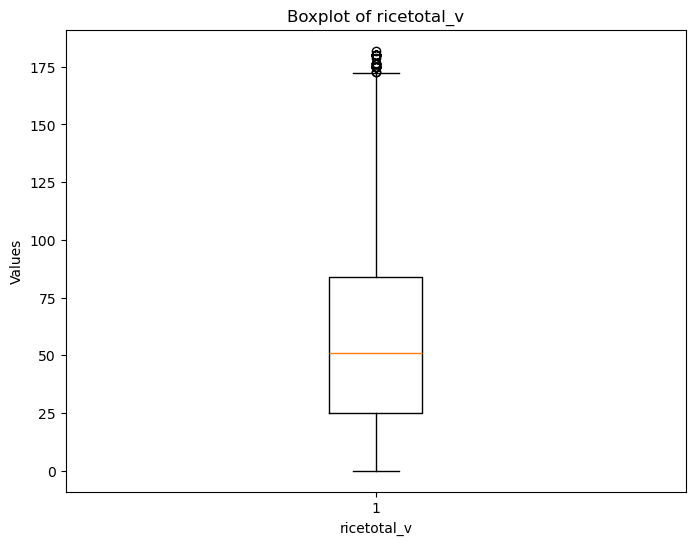

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.boxplot(state_cleaned['ricetotal_v'])
plt.xlabel('ricetotal_v')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_v')
plt.show()


In [19]:
state_cleaned['total_consumption']=state_cleaned[['ricetotal_v', 'wheattotal_v', 'Milktotal_v', 
     'pulsestot_v', 'nonvegtotal_v', 'fruitstt_v']].sum(axis=1)

In [20]:
def summarize_consumption(df, group_col):
    summary = df.groupby(group_col)['total_consumption'].sum().reset_index()
    summary = summary.sort_values(by='total_consumption', ascending=False)
    return summary

district_summary= summarize_consumption(state_cleaned,'District')
region_summary= summarize_consumption(state_cleaned,'Region')
sector_summary= summarize_consumption(state_cleaned,'Sector')

print("\n top 4 consuming districts:")
print(district_summary.head(4))

print("\n region consumption summary:")
print(region_summary)

print("\n sector consumption summary:")
print(sector_summary)

print("\n bottom 4 consuming districts")
print(district_summary.tail(4))


 top 4 consuming districts:
    District  total_consumption
21        22      204660.832065
20        21      187410.057834
23        25      134993.055519
32        34       95712.092064

 region consumption summary:
   Region  total_consumption
0       1      498403.234560
1       2      442532.751781
4       5      315891.633667
2       3      204039.150401
3       4      172894.047681
5       6       98827.607540

 sector consumption summary:
   Sector  total_consumption
1       2      994296.256367
0       1      738292.169264

 bottom 4 consuming districts
    District  total_consumption
11        12       18700.870238
16        17       18196.805339
27        29       17715.615945
15        16       10268.560895


In [27]:
state_cleaned['District']= state_cleaned['District'].astype(str)
state_cleaned['Sector']= state_cleaned['Sector'].astype(str)

district_mapping={
    "22":"Mumbai", "21": "Thane", "25":"Pune",
                      "34":"Kolhapur","12":"Gadchiroli", "17":"Parbhani",
                      "29":'Osmanabad',"16":"Hingoli"
}

sector_mapping={"2":"URBAN","1":"RURAL"}

state_cleaned['District']=state_cleaned['District'].map(district_mapping).fillna(state_subset['District'])
state_cleaned['Sector']=state_cleaned['Sector'].map(sector_mapping).fillna(state_subset['Sector'])

district_summary= summarize_consumption(state_cleaned,'District')
region_summary= summarize_consumption(state_cleaned,'Region')
sector_summary= summarize_consumption(state_cleaned,'Sector')

print("\n updated district summary(after mapping):")
print(district_summary.head(4))

print("\n region summary:")
print(region_summary)

print("\n sector summary:")
print(sector_summary)
print(district_summary.tail(4))


 updated district summary(after mapping):
    District  total_consumption
29    Mumbai      204660.832065
33     Thane      187410.057834
32      Pune      134993.055519
28  Kolhapur       95712.092064

 region summary:
   Region  total_consumption
0       1      498403.234560
1       2      442532.751781
4       5      315891.633667
2       3      204039.150401
3       4      172894.047681
5       6       98827.607540

 sector summary:
  Sector  total_consumption
1  URBAN      994296.256367
0  RURAL      738292.169264
      District  total_consumption
26  Gadchiroli       18700.870238
31    Parbhani       18196.805339
30   Osmanabad       17715.615945
27     Hingoli       10268.560895


In [22]:
first_district=district_summary.head(2).iloc[0]['District']

In [23]:
last_district=district_summary.head(2).iloc[0]['District']
last_district

'Mumbai'

In [24]:
consumption_rural = state_cleaned[state_cleaned['Sector'] == 'RURAL']['total_consumption']
consumption_urban = state_cleaned[state_cleaned['Sector'] == 'URBAN']['total_consumption']

z_statistic, p_value = stests.ztest(consumption_rural, consumption_urban, alternative='two-sided')

print(" Z-Test for Rural vs Urban Consumption")
print("Z-Score:", round(z_statistic, 4))
print("P-Value:", round(p_value, 4))

if p_value < 0.05:
    print(" Significant difference between Rural and Urban mean consumption (Reject H₀)")
else:
    print(" No significant difference between Rural and Urban mean consumption (Fail to reject H₀)")


 Z-Test for Rural vs Urban Consumption
Z-Score: -20.9189
P-Value: 0.0
 Significant difference between Rural and Urban mean consumption (Reject H₀)


In [28]:
top_district = state_cleaned[state_cleaned['District'] == district_summary.head(1).iloc[0]['District']]['total_consumption']
bottom_district = state_cleaned[state_cleaned['District'] == district_summary.tail(1).iloc[0]['District']]['total_consumption']

z_statistic, p_value = stests.ztest(consumption_rural, consumption_urban, alternative='two-sided')

print("Z test for top and bottom Consumption")
print("Z-Score:", round(z_statistic, 4))
print("P-Value:", round(p_value, 4))

if p_value < 0.05:
    print(f" Significant difference between {district_summary.head(1).iloc[0]['District']} and {district_summary.tail(1).iloc[0]['District']} mean consumption (Reject H₀)")
else:
    print(f" No significant difference between {district_summary.head(1).iloc[0]['District']} and {district_summary.tail(1).iloc[0]['District']} mean consumption (Fail to reject H₀)")


Z test for top and bottom Consumption
Z-Score: -20.9189
P-Value: 0.0
 Significant difference between Mumbai and Hingoli mean consumption (Reject H₀)
